# 十分钟上手pandas

`pandas`是`python data analysis library`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 产生pandas对象

`panda` 中有三种基本结构

- `series`
    - 1D labeled homogeneously-typed array
- `DataFrame`
    - General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
- `Panel`
    - General 3D labeled, alse size-mutable array

## Series

一维 Series 可以用一维列表初始化

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
type(s)

pandas.core.series.Series

In [9]:
s[4]

6.0

默认情况下，Series的下标都是数字（可以使用额外参数指定），类型是统一的

## DataFrame

`DataFrame`则是二维结构，这里首先构造一组时间序列，作为我们第一维的下标

In [10]:
dates = pd.date_range('20220606', periods=6)
dates

DatetimeIndex(['2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09',
               '2022-06-10', '2022-06-11'],
              dtype='datetime64[ns]', freq='D')

然后创建一个`DataFrame`结构

In [11]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2022-06-06,-0.961196,-0.429906,0.941816,-0.574689
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806
2022-06-09,1.497418,0.254663,-0.129358,-0.684549
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947
2022-06-11,-1.201813,-0.384883,0.186161,1.357098


默认情况下，如果不指定index参数和columns，那么他们的值将由从0开始的数字替代

除了向DataFrame中传入二维数组，我们也可以使用字典传入数据

In [23]:
df2 = pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20220606'),
                    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D':np.array([3]*4, dtype='int32'),
                    'E':pd.Categorical(['test', 'train', 'test', 'train']),
                    'F':'foo'})
df2

,A,B,C,D,E,F
0,1.0,2022-06-06,1.0,3,test,foo
1,1.0,2022-06-06,1.0,3,train,foo
2,1.0,2022-06-06,1.0,3,test,foo
3,1.0,2022-06-06,1.0,3,train,foo


字典的每个key代表一列，其value可以是各种能够转换为Series的对象

与Series要求所有的类型都一样不同，DataFrame要求每一列的数据格式相同

In [24]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查看数据

### 头尾数据

head和tail方法可以分别查看最前面几行和最后面几行的数据（默认为5）

In [26]:
df.head()

,A,B,C,D
2022-06-06,-0.961196,-0.429906,0.941816,-0.574689
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806
2022-06-09,1.497418,0.254663,-0.129358,-0.684549
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947


In [27]:
df.tail(3)

,A,B,C,D
2022-06-09,1.497418,0.254663,-0.129358,-0.684549
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947
2022-06-11,-1.201813,-0.384883,0.186161,1.357098


### 下标，列标，数据

In [29]:
df

,A,B,C,D
2022-06-06,-0.961196,-0.429906,0.941816,-0.574689
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806
2022-06-09,1.497418,0.254663,-0.129358,-0.684549
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947
2022-06-11,-1.201813,-0.384883,0.186161,1.357098


In [28]:
df.index

DatetimeIndex(['2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09',
               '2022-06-10', '2022-06-11'],
              dtype='datetime64[ns]', freq='D')

In [30]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [31]:
df.values

array([[-0.96119647, -0.42990611,  0.94181569, -0.57468906],
       [-1.01380467, -0.27295487,  1.61076022, -0.15906092],
       [-0.28947692, -0.82266556,  1.19989395, -0.68080593],
       [ 1.49741811,  0.25466293, -0.12935807, -0.6845491 ],
       [ 0.45123852, -1.3647538 , -1.02092038, -0.57794724],
       [-1.2018128 , -0.38488267,  0.18616139,  1.35709832]])

### 统计数据

查看简单的统计数据

In [32]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.252939,-0.503417,0.464725,-0.219992
std,1.052792,0.546090,0.971510,0.796622
min,-1.201813,-1.364754,-1.020920,-0.684549
25%,-1.000653,-0.724476,-0.050478,-0.655091
50%,-0.625337,-0.407394,0.563989,-0.576318
75%,0.266060,-0.300937,1.135374,-0.262968
max,1.497418,0.254663,1.610760,1.357098


### 转置

In [33]:
df.T

,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11
A,-0.961196,-1.013805,-0.289477,1.497418,0.451239,-1.201813
B,-0.429906,-0.272955,-0.822666,0.254663,-1.364754,-0.384883
C,0.941816,1.610760,1.199894,-0.129358,-1.020920,0.186161
D,-0.574689,-0.159061,-0.680806,-0.684549,-0.577947,1.357098


In [34]:
df

,A,B,C,D
2022-06-06,-0.961196,-0.429906,0.941816,-0.574689
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806
2022-06-09,1.497418,0.254663,-0.129358,-0.684549
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947
2022-06-11,-1.201813,-0.384883,0.186161,1.357098


## 排序

sort_index(axis=0, ascending=True)方法按照下标大小进行排序，axis=0表示按第0维进行排序

In [35]:
df.sort_index(ascending=False)

,A,B,C,D
2022-06-11,-1.201813,-0.384883,0.186161,1.357098
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947
2022-06-09,1.497418,0.254663,-0.129358,-0.684549
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061
2022-06-06,-0.961196,-0.429906,0.941816,-0.574689


In [36]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2022-06-06,-0.574689,0.941816,-0.429906,-0.961196
2022-06-07,-0.159061,1.610760,-0.272955,-1.013805
2022-06-08,-0.680806,1.199894,-0.822666,-0.289477
2022-06-09,-0.684549,-0.129358,0.254663,1.497418
2022-06-10,-0.577947,-1.020920,-1.364754,0.451239
2022-06-11,1.357098,0.186161,-0.384883,-1.201813


`sort_values(by, axis=0, ascending=True)` 方法按照 `by` 的值的大小进行排序，例如按照 `B` 列的大小：

In [38]:
df.sort_values(by='B')

,A,B,C,D
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806
2022-06-06,-0.961196,-0.429906,0.941816,-0.574689
2022-06-11,-1.201813,-0.384883,0.186161,1.357098
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061
2022-06-09,1.497418,0.254663,-0.129358,-0.684549


## 索引

虽然 `DataFrame` 支持 `Python/Numpy` 的索引语法，但是推荐使用 `.at, .iat, .loc, .iloc 和 .ix` 方法进行索引。

### 读取数据

选择单列数据

In [39]:
df['A']

2022-06-06   -0.961196
2022-06-07   -1.013805
2022-06-08   -0.289477
2022-06-09    1.497418
2022-06-10    0.451239
2022-06-11   -1.201813
Freq: D, Name: A, dtype: float64

或者

In [40]:
df.A

2022-06-06   -0.961196
2022-06-07   -1.013805
2022-06-08   -0.289477
2022-06-09    1.497418
2022-06-10    0.451239
2022-06-11   -1.201813
Freq: D, Name: A, dtype: float64

使用切片读取多行

In [41]:
df[:3]

,A,B,C,D
2022-06-06,-0.961196,-0.429906,0.941816,-0.574689
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806


index名字也可以进行切片

In [45]:
df['20220606':'20220608']

,A,B,C,D
2022-06-06,-0.961196,-0.429906,0.941816,-0.574689
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806


### 使用label索引

In [46]:
df.loc[dates[0]]

A   -0.961196
B   -0.429906
C    0.941816
D   -0.574689
Name: 2022-06-06 00:00:00, dtype: float64

多列数据

In [47]:
df.loc[:,['A', 'B']]

,A,B
2022-06-06,-0.961196,-0.429906
2022-06-07,-1.013805,-0.272955
2022-06-08,-0.289477,-0.822666
2022-06-09,1.497418,0.254663
2022-06-10,0.451239,-1.364754
2022-06-11,-1.201813,-0.384883


选择多行多列

In [48]:
df.loc[['20220606', '20220608'], ['A', 'C']]

,A,C
2022-06-06,-0.961196,0.941816
2022-06-08,-0.289477,1.199894


数据降维

In [49]:
df.loc['20220606', ['A', 'B']]

A   -0.961196
B   -0.429906
Name: 2022-06-06 00:00:00, dtype: float64

得到标量值

In [50]:
df.loc[dates[0], 'B']

-0.42990611341531093

不过得到标量值可以用at，速度更快

In [52]:
%timeit -n100 df.loc[dates[0], 'B']
%timeit -n100 df.at[dates[0], 'B']
df.at[dates[0], 'B']

61.9 µs ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
45.3 µs ± 7.86 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


-0.42990611341531093

### 使用位置索引

iloc使用位置进行索引

In [53]:
df.iloc[3]

A    1.497418
B    0.254663
C   -0.129358
D   -0.684549
Name: 2022-06-09 00:00:00, dtype: float64

连续切片

In [55]:
df.iloc[2:4, 1:3]

,B,C
2022-06-08,-0.822666,1.199894
2022-06-09,0.254663,-0.129358


索引不连续的部分

In [56]:
df.iloc[[1,2,4],[0,2]]

,A,C
2022-06-07,-1.013805,1.610760
2022-06-08,-0.289477,1.199894
2022-06-10,0.451239,-1.020920


索引整行

In [57]:
df.iloc[:, 1:3]

,B,C
2022-06-06,-0.429906,0.941816
2022-06-07,-0.272955,1.610760
2022-06-08,-0.822666,1.199894
2022-06-09,0.254663,-0.129358
2022-06-10,-1.364754,-1.020920
2022-06-11,-0.384883,0.186161


整列

In [58]:
df.iloc[:, 1:3]

,B,C
2022-06-06,-0.429906,0.941816
2022-06-07,-0.272955,1.610760
2022-06-08,-0.822666,1.199894
2022-06-09,0.254663,-0.129358
2022-06-10,-1.364754,-1.020920
2022-06-11,-0.384883,0.186161


标量值

In [59]:
df.iloc[1,1]

-0.27295487332037255

当然，使用iat索引标量值更快

In [60]:
%timeit -n100 df.iloc[1,1]
%timeit -n100 df.iat[1,1]
df.iat[1,1]

The slowest run took 4.95 times longer than the fastest. This could mean that an intermediate result is being cached.
53.3 µs ± 35.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.9 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


-0.27295487332037255

布尔型索引

所有A列大于0的行

In [61]:
df[df.A>0]

,A,B,C,D
2022-06-09,1.497418,0.254663,-0.129358,-0.684549
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947


只留下所有大于0的数值

In [62]:
df[df>0]

,A,B,C,D
2022-06-06,NaN,NaN,0.941816,NaN
2022-06-07,NaN,NaN,1.610760,NaN
2022-06-08,NaN,NaN,1.199894,NaN
2022-06-09,1.497418,0.254663,NaN,NaN
2022-06-10,0.451239,NaN,NaN,NaN
2022-06-11,NaN,NaN,0.186161,1.357098


使用isin方法做filter过滤

In [64]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2022-06-06,-0.961196,-0.429906,0.941816,-0.574689,one
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061,one
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806,two
2022-06-09,1.497418,0.254663,-0.129358,-0.684549,three
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947,four
2022-06-11,-1.201813,-0.384883,0.186161,1.357098,three


In [65]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806,two
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947,four


### 设定数据的值

In [73]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20220607', periods=6))
s1

2022-06-07    1
2022-06-08    2
2022-06-09    3
2022-06-10    4
2022-06-11    5
2022-06-12    6
Freq: D, dtype: int64

像字典一样，直接指定 `F` 列的值为 `s1`，此时以 `df` 已有的 `index` 为标准将二者进行合并，`s1` 中没有的 `index` 项设为 `NaN`，多余的项舍去：

In [74]:
df['F'] = s1
df

,A,B,C,D,F
2022-06-06,-0.961196,-0.429906,0.941816,-0.574689,NaN
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061,1.0
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806,2.0
2022-06-09,1.497418,0.254663,-0.129358,-0.684549,3.0
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947,4.0
2022-06-11,-1.201813,-0.384883,0.186161,1.357098,5.0


或者使用at或iat修改单个值

In [75]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2022-06-06,0.000000,-0.429906,0.941816,-0.574689,NaN
2022-06-07,-1.013805,-0.272955,1.610760,-0.159061,1.0
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806,2.0
2022-06-09,1.497418,0.254663,-0.129358,-0.684549,3.0
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947,4.0
2022-06-11,-1.201813,-0.384883,0.186161,1.357098,5.0


In [78]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2022-06-06,0.000000,0.000000,0.941816,-0.574689,NaN
2022-06-07,-1.013805,0.000000,1.610760,-0.159061,1.0
2022-06-08,-0.289477,-0.822666,1.199894,-0.680806,2.0
2022-06-09,1.497418,0.254663,-0.129358,-0.684549,3.0
2022-06-10,0.451239,-1.364754,-1.020920,-0.577947,4.0
2022-06-11,-1.201813,-0.384883,0.186161,1.357098,5.0


设定一整列

In [79]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2022-06-06,0.000000,0.000000,0.941816,5,NaN
2022-06-07,-1.013805,0.000000,1.610760,5,1.0
2022-06-08,-0.289477,-0.822666,1.199894,5,2.0
2022-06-09,1.497418,0.254663,-0.129358,5,3.0
2022-06-10,0.451239,-1.364754,-1.020920,5,4.0
2022-06-11,-1.201813,-0.384883,0.186161,5,5.0


设定满足条件的数值

In [83]:
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,F
2022-06-06,0.000000,0.000000,-0.941816,-5,NaN
2022-06-07,-1.013805,0.000000,-1.610760,-5,-1.0
2022-06-08,-0.289477,-0.822666,-1.199894,-5,-2.0
2022-06-09,-1.497418,-0.254663,-0.129358,-5,-3.0
2022-06-10,-0.451239,-1.364754,-1.020920,-5,-4.0
2022-06-11,-1.201813,-0.384883,-0.186161,-5,-5.0


## 缺失数据

In [84]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2022-06-06,0.000000,0.000000,0.941816,5,NaN,1.0
2022-06-07,-1.013805,0.000000,1.610760,5,1.0,1.0
2022-06-08,-0.289477,-0.822666,1.199894,5,2.0,NaN
2022-06-09,1.497418,0.254663,-0.129358,5,3.0,NaN


丢弃所有缺失数据的行得到的新数据

In [85]:
df1.dropna(how='any')

,A,B,C,D,F,E
2022-06-07,-1.013805,0.0,1.61076,5,1.0,1.0


填充缺失数据

In [88]:
df1.fillna(value=5)

,A,B,C,D,F,E
2022-06-06,0.000000,0.000000,0.941816,5,5.0,1.0
2022-06-07,-1.013805,0.000000,1.610760,5,1.0,1.0
2022-06-08,-0.289477,-0.822666,1.199894,5,2.0,5.0
2022-06-09,1.497418,0.254663,-0.129358,5,3.0,5.0


检查缺失数据的位置

In [89]:
pd.isnull(df1)

,A,B,C,D,F,E
2022-06-06,False,False,False,False,True,False
2022-06-07,False,False,False,False,False,False
2022-06-08,False,False,False,False,False,True
2022-06-09,False,False,False,False,False,True


## 计算操作

### 统计信息

每一列的均值

In [90]:
df.mean()

A   -0.092740
B   -0.386273
C    0.464725
D    5.000000
F    3.000000
dtype: float64

每一行的均值

In [91]:
df.mean(1)

2022-06-06    1.485454
2022-06-07    1.319391
2022-06-08    1.417550
2022-06-09    1.924545
2022-06-10    1.413113
2022-06-11    1.719893
Freq: D, dtype: float64

多个对象之间的操作，如果维度不对，pandas会自动调用broadcasting机制(此处填充nan)

In [100]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2022-06-06    NaN
2022-06-07    NaN
2022-06-08    1.0
2022-06-09    3.0
2022-06-10    5.0
2022-06-11    NaN
Freq: D, dtype: float64

相减df-s

In [101]:
df.sub(s, axis='index')

,A,B,C,D,F
2022-06-06,NaN,NaN,NaN,NaN,NaN
2022-06-07,NaN,NaN,NaN,NaN,NaN
2022-06-08,-1.289477,-1.822666,0.199894,4.0,1.0
2022-06-09,-1.502582,-2.745337,-3.129358,2.0,0.0
2022-06-10,-4.548761,-6.364754,-6.020920,0.0,-1.0
2022-06-11,NaN,NaN,NaN,NaN,NaN


### apply操作

与R中的apply操作类似，接收一个函数，默认是对将函数作用到每一列上

In [102]:
df.apply(np.cumsum)

,A,B,C,D,F
2022-06-06,0.000000,0.000000,0.941816,5,NaN
2022-06-07,-1.013805,0.000000,2.552576,10,1.0
2022-06-08,-1.303282,-0.822666,3.752470,15,3.0
2022-06-09,0.194137,-0.568003,3.623112,20,6.0
2022-06-10,0.645375,-1.932756,2.602191,25,10.0
2022-06-11,-0.556438,-2.317639,2.788353,30,15.0


求每列最大最小值之差

In [103]:
df.apply(lambda x: x.max() - x.min())

A    2.699231
B    1.619417
C    2.631681
D    0.000000
F    4.000000
dtype: float64

### 直方图

In [104]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    0
2    2
3    6
4    0
5    3
6    0
7    1
8    3
9    6
dtype: int64

直方图信息

In [105]:
s.value_counts()

6    3
0    3
3    2
2    1
1    1
dtype: int64

绘制直方图信息

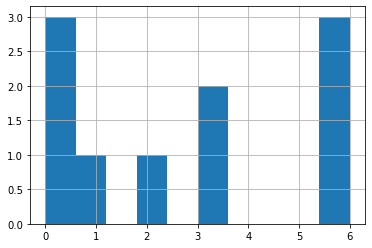

In [106]:
h = s.hist()

### 字符串方法

当 `Series` 或者 `DataFrame` 的某一列是字符串时，我们可以用 `.str` 对这个字符串数组进行字符串的基本操作： 

In [107]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并

### 连接

In [108]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.081387,0.376108,1.168902,2.030727
1,-1.106061,0.773092,-1.336793,-1.548574
2,-0.322009,-0.072323,-0.218221,-0.670475
3,1.518055,0.227691,1.623302,-1.362981
4,0.826994,-0.036541,0.765548,0.620928
5,-1.533596,-1.690233,-0.467575,0.189644
6,1.468200,0.591214,0.330153,0.067854
7,0.811257,-1.662951,-0.774894,0.711180
8,-0.278320,0.324842,0.465786,-1.518905
9,0.003846,-0.365297,-3.309501,-0.697341


可以使用pd.concat函数将多个pandas对象进行连接

In [109]:
pieces = [df[:2], df[4:5], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.081387,0.376108,1.168902,2.030727
1,-1.106061,0.773092,-1.336793,-1.548574
4,0.826994,-0.036541,0.765548,0.620928
7,0.811257,-1.662951,-0.774894,0.711180
8,-0.278320,0.324842,0.465786,-1.518905
9,0.003846,-0.365297,-3.309501,-0.697341


### 数据库中的Join

merge可以实现数据库中的join操作

In [111]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1,2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4,5]})
print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [112]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### append

向DataFrame中添加行

In [113]:
df = pd.DataFrame(np.random.randn(8,4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.317334,0.215505,0.849439,-0.492586
1,-1.980116,0.079296,0.898393,0.834502
2,-0.683591,-0.528924,-1.325326,-0.500974
3,0.523070,0.042625,0.728661,2.545797
4,1.032012,0.797801,1.330663,-0.125399
5,0.879645,0.548569,-1.291280,-0.795114
6,-0.899392,0.149837,1.769257,1.690347
7,-0.379657,0.933175,-0.087169,2.947538


将第3行的值添加到最后

In [114]:
s = df.iloc[3]
df.append(s, ignore_index=True)

/tmp/ipykernel_17689/4137272448.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,-1.317334,0.215505,0.849439,-0.492586
1,-1.980116,0.079296,0.898393,0.834502
2,-0.683591,-0.528924,-1.325326,-0.500974
3,0.523070,0.042625,0.728661,2.545797
4,1.032012,0.797801,1.330663,-0.125399
5,0.879645,0.548569,-1.291280,-0.795114
6,-0.899392,0.149837,1.769257,1.690347
7,-0.379657,0.933175,-0.087169,2.947538
8,0.523070,0.042625,0.728661,2.545797


### Grouping

In [123]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                        'foo', 'bar', 'foo', 'foo'],
                   'B': ['one','one' , 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.514048,0.652757
1,bar,one,0.693884,-0.164225
2,foo,two,1.016870,-0.933765
3,bar,three,0.042260,0.185804
4,foo,two,0.402976,-1.203746
5,bar,two,0.189913,-0.836750
6,foo,one,-0.106628,1.139345
7,foo,three,-1.156299,1.938761


按照A的值进行分类

In [126]:
df.groupby('A').sum()

,C,D
A,,
bar,0.926057,-0.815171
foo,-0.357129,1.593353


按照AB的值进行分类

In [127]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.693884 -0.164225
    three  0.042260  0.185804
    two    0.189913 -0.836750
foo one   -0.620676  1.792102
    three -1.156299  1.938761
    two    1.419846 -2.137511

## 改变形状

### Stack

产生一个多index的DataFrame

In [130]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                    'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.652335  0.421793
      two     0.159732 -0.003148
baz   one     0.008713  0.304056
      two     1.532360  0.449560
foo   one    -0.172503  0.359438
      two     1.411706 -2.024379
qux   one     1.448856  0.615050
      two     0.056612  0.357378

stack方法将columns变成一个新的index部分

In [132]:
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.652335
               B    0.421793
       two     A    0.159732
               B   -0.003148
baz    one     A    0.008713
               B    0.304056
       two     A    1.532360
               B    0.449560
dtype: float64

可以使用unstack()将最后一级index放回column

In [133]:
stacked.unstack()

A         B
first second                    
bar   one     0.652335  0.421793
      two     0.159732 -0.003148
baz   one     0.008713  0.304056
      two     1.532360  0.449560

也可以指定其他的级别

In [134]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.652335  0.159732
      B  0.421793 -0.003148
baz   A  0.008713  1.532360
      B  0.304056  0.449560

In [136]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.652335  0.008713
       B  0.421793  0.304056
two    A  0.159732  1.532360
       B -0.003148  0.449560

## 时间序列

金融分析中常用到时间序列数据

In [137]:
rng = pd.date_range('6/6/2022 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2022-06-06    0.483867
2022-06-07    0.176767
2022-06-08   -2.575720
2022-06-09    0.165461
2022-06-10   -0.964638
Freq: D, dtype: float64

标准时间表示

In [138]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2022-06-06 00:00:00+00:00    0.483867
2022-06-07 00:00:00+00:00    0.176767
2022-06-08 00:00:00+00:00   -2.575720
2022-06-09 00:00:00+00:00    0.165461
2022-06-10 00:00:00+00:00   -0.964638
Freq: D, dtype: float64

改变时区表示

In [139]:
ts_utc.tz_convert('US/Eastern')

2022-06-05 20:00:00-04:00    0.483867
2022-06-06 20:00:00-04:00    0.176767
2022-06-07 20:00:00-04:00   -2.575720
2022-06-08 20:00:00-04:00    0.165461
2022-06-09 20:00:00-04:00   -0.964638
Freq: D, dtype: float64

## Categoricals

In [140]:
df = pd.DataFrame({'id': [1,2,3,4,5,6], 'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


可以将grade变成类别

In [141]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

将类别的表示转化为有意义的字符

In [142]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

添加缺失的类别

In [143]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

使用grade分组

In [144]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图

使用ggplot风格

In [145]:
plt.style.use('ggplot')

Series绘图

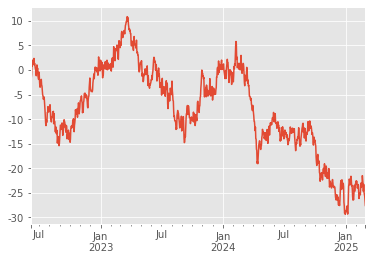

In [146]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('6/6/2022', periods=1000))
p = ts.cumsum().plot()

DataFrame按照columns绘图

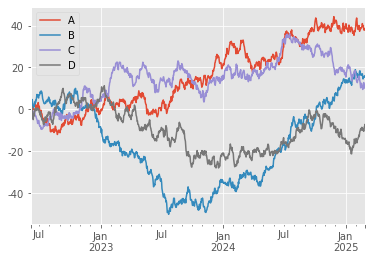

In [147]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A','B','C','D'])
df.cumsum().plot()
plt.legend(loc='best')

## 文件读写

### CSV

写入文件

In [148]:
df.to_csv('foo.csv')

读取文件

In [149]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2022-06-06,0.676765,0.939155,0.210803,-0.456714
1,2022-06-07,-2.059848,1.631668,0.159549,-0.220836
2,2022-06-08,1.732828,-0.169691,-1.725943,0.670550
3,2022-06-09,0.265963,1.453580,-1.028086,0.432464
4,2022-06-10,-0.892927,0.868335,-0.667590,0.874595


### hdf5

写入文件

In [151]:
df.to_hdf('foo.h5', 'df')

读取文件

In [152]:
pd.read_hdf('foo.h5', 'df').head()

,A,B,C,D
2022-06-06,0.676765,0.939155,0.210803,-0.456714
2022-06-07,-2.059848,1.631668,0.159549,-0.220836
2022-06-08,1.732828,-0.169691,-1.725943,0.670550
2022-06-09,0.265963,1.453580,-1.028086,0.432464
2022-06-10,-0.892927,0.868335,-0.667590,0.874595


### excel

写入文件

In [155]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

读取文件

In [156]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,Unnamed: 0,A,B,C,D
0,2022-06-06,0.676765,0.939155,0.210803,-0.456714
1,2022-06-07,-2.059848,1.631668,0.159549,-0.220836
2,2022-06-08,1.732828,-0.169691,-1.725943,0.670550
3,2022-06-09,0.265963,1.453580,-1.028086,0.432464
4,2022-06-10,-0.892927,0.868335,-0.667590,0.874595


清理生成的临时文件

In [158]:
import glob
import os
for f in glob.glob('foo*'):
    os.remove(f)